### Sentiment Analysis

Steps:
1. Install the libraries
2. Load the data
3. Load the BERT pretained tokenizer model
4. Process the data and generate the encodings
5. Train the classification model
6. Evaluate the model
7. Save the model
8. Predict the output

In [ ]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00


In [ ]:
# Read the dataset csv file
import pandas as pd
df = pd.read_csv('./dataset/sentiment.csv')
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


#### Check the distribution of classes

<Axes: >

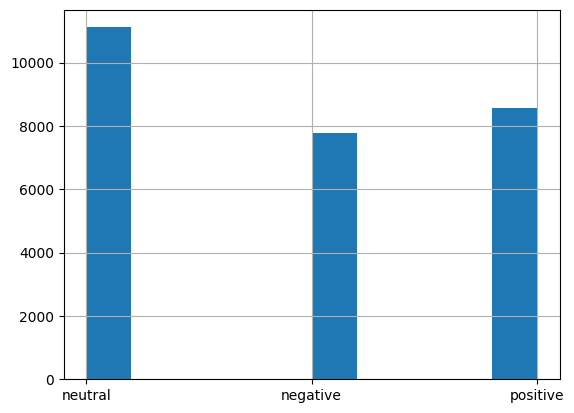

In [ ]:
df['sentiment'].hist()

In [ ]:
# Load the BERT pretained model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Process the data
def process_data(row):

    text = row['text']
    text = str(text)

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    label = 0
    if row['sentiment'] == 'neutral':
        label += 1
    elif row['sentiment'] == 'positive':
        label += 2

    encodings['label'] = label
    encodings['text'] = text

    return encodings


# Test the function for sample data
print(process_data({
    'text': "I love it.",
    'sentiment': "positive"
}))

{'input_ids': [101, 1045, 2293, 2009, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Generate encoding for all the rows in the csv file
processed_data = []

for i in range(len(df[:100])):
    processed_data.append(process_data(df.iloc[i]))

In [ ]:
# Split the train and test dataset
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)

train_df, valid_df = train_test_split(
    new_df,
    test_size=0.2,
    random_state=2022
)

In [ ]:
!pip install pyarrow
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [ ]:
# convert the data into Dataset format to support the training model
import pyarrow as pa
from datasets import Dataset

train = Dataset(pa.Table.from_pandas(train_df))
valid = Dataset(pa.Table.from_pandas(valid_df))

When creating the model make sure to update the **num_labels** to **3**

In [ ]:
# Create the model
from transformers import TrainingArguments, Trainer, AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3
)

training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train,
    eval_dataset=valid,
    tokenizer=tokenizer
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
trainer.train()

You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,No log,1.051211
2,No log,1.009052
3,No log,1.020982


TrainOutput(global_step=30, training_loss=0.9939661661783854, metrics={'train_runtime': 441.0901, 'train_samples_per_second': 0.544, 'train_steps_per_second': 0.068, 'total_flos': 15786805063680.0, 'train_loss': 0.9939661661783854, 'epoch': 3.0})

In [ ]:
# Save the model
model.save_pretrained('./model/')

In [ ]:
from transformers import AutoModelForSequenceClassification, TextClassificationPipeline

model = AutoModelForSequenceClassification.from_pretrained('./model/', id2label={0: 'negative', 1: 'neutral', 2: 'positive'})

pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True)

pipe("I hate it. Awful!")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'negative', 'score': 0.2896459996700287},
  {'label': 'neutral', 'score': 0.44201427698135376},
  {'label': 'positive', 'score': 0.26833972334861755}]]

In [ ]:
pipe("26th February")

[[{'label': 'negative', 'score': 0.19981519877910614},
  {'label': 'neutral', 'score': 0.5723533034324646},
  {'label': 'positive', 'score': 0.22783149778842926}]]